In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
import pandas as pd
import matplotlib as plot
from glob import glob


In [4]:
f = "../data/data_sept_10/2022-ene-tmix_hora_L1.csv"
tmx_enero = pd.read_csv(f, encoding = 'unicode_escape',
                       skiprows=[0,1,2,3,4,5,7],
                       usecols=[0,1,2,3,8],
                       index_col=0,
                        parse_dates = True
                       )
tmx_enero.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2022-01-01 00:00:00 to 2022-01-31 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp_Avg    744 non-null    float64
 1   RH_Avg      744 non-null    float64
 2   WSpeed_Avg  744 non-null    float64
 3   Rad_Avg     744 non-null    float64
dtypes: float64(4)
memory usage: 29.1 KB


<Axes: xlabel='TIMESTAMP'>

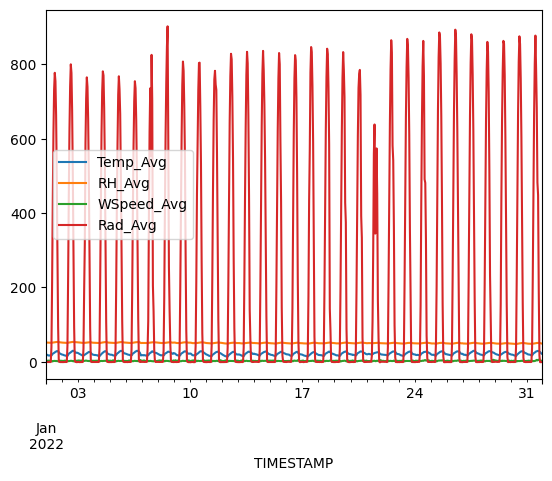

In [5]:
tmx_enero.plot()

In [6]:
tmx_enero.loc['2022-01-12':'2022-01-15',["Temp_Avg"]]  #Aca podemos llamar un intervalo de fechas 
                                                       #no se si se pueda poner un salto por jemeplo, cada 6 horas

,Temp_Avg
TIMESTAMP,
2022-01-12 00:00:00,18.79
2022-01-12 01:00:00,17.77
2022-01-12 02:00:00,16.65
2022-01-12 03:00:00,15.67
2022-01-12 04:00:00,14.72
...,...
2022-01-15 19:00:00,23.30
2022-01-15 20:00:00,22.51
2022-01-15 21:00:00,22.14


In [7]:
tmx_enero.iloc[0::6,[0,3]]  #Aca podemos llamar un intervalos de datos usando las posiciones y en un salto, en este caso es cada 6 horas
                            #en una lista podemos escoger las variables usando solo los indices 
                            #iloc solo funciona con numeros, no funciona con strings

,Temp_Avg,Rad_Avg
TIMESTAMP,,
2022-01-01 00:00:00,18.84,-1.506
2022-01-01 06:00:00,16.73,-1.423
2022-01-01 12:00:00,23.26,731.815
2022-01-01 18:00:00,27.18,93.651
2022-01-02 00:00:00,18.72,-1.344
...,...,...
2022-01-30 18:00:00,27.51,155.664
2022-01-31 00:00:00,21.07,-1.325
2022-01-31 06:00:00,17.53,-1.357


## Ahora vamos a mportar dos archivos, queremos juntar varios meses en un solo df del an[o 2022

In [8]:
def read_ruoa(file):
    df = pd.read_csv(f, encoding = 'unicode_escape',
                       skiprows=[0,1,2,3,4,5,7],
                       usecols=[0,1,2,3,8],
                       index_col=0,
                        parse_dates = True
                       )
    return df

In [9]:
file = "../data/data_sept_10/2022-ene-tmix_hora_L1.csv"
tmx_enero = read_ruoa(file)

In [10]:
file = "../data/data_sept_10/2022-feb-tmix_hora_L1.csv"
tmx_febrero = read_ruoa(file)

In [11]:
pd.concat([tmx_enero,tmx_febrero], axis = 0)    #aca vamos combinar los df, el axis 0 lo concatena hacia abajo

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426
...,...,...,...,...
2022-01-31 19:00:00,26.83,49.88,3.446,15.612
2022-01-31 20:00:00,25.63,49.64,2.945,-1.785
2022-01-31 21:00:00,23.18,48.95,1.520,-1.544


In [12]:
pd.concat([tmx_enero,tmx_febrero], axis = 1)    #aca vamos combinar los df, el axis 1 lo concatena a la derecha
# podemos agregar mas df poniendo mas elemnetos en la lista

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506,18.84,51.14,1.940,-1.506
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467,18.26,51.02,1.384,-1.467
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253,17.78,50.88,1.971,-1.253
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051,16.50,50.55,2.367,-1.051
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426,16.28,50.54,2.281,-1.426
...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,26.83,49.88,3.446,15.612,26.83,49.88,3.446,15.612
2022-01-31 20:00:00,25.63,49.64,2.945,-1.785,25.63,49.64,2.945,-1.785
2022-01-31 21:00:00,23.18,48.95,1.520,-1.544,23.18,48.95,1.520,-1.544


# GLob
Si no queremos hacer todo el proceso de arriba 12 veces

In [13]:
paths = glob("../data/data_sept_10/2022*")  #le damos una ruta y un patron y nos regresa todos los archivos que coinciden con el patron que le estamos dando
#aca al ponerle 2022* nos regresa todos los que contengan al a;o 2022 y los devuelve en una lista 

In [14]:
paths[1]

'../data/data_sept_10/2022-abr-tmix_hora_L1.csv'

In [15]:
df = []
for path in paths:
    df.append(read_ruoa(path))

df         #Es una lista con 12 dataframes si fuera un a;o, pero ahorita tenemos solo 9 meses 

[                     Temp_Avg  RH_Avg  WSpeed_Avg  Rad_Avg
 TIMESTAMP                                                 
 2022-01-01 00:00:00     18.84   51.14       1.940   -1.506
 2022-01-01 01:00:00     18.26   51.02       1.384   -1.467
 2022-01-01 02:00:00     17.78   50.88       1.971   -1.253
 2022-01-01 03:00:00     16.50   50.55       2.367   -1.051
 2022-01-01 04:00:00     16.28   50.54       2.281   -1.426
 ...                       ...     ...         ...      ...
 2022-01-31 19:00:00     26.83   49.88       3.446   15.612
 2022-01-31 20:00:00     25.63   49.64       2.945   -1.785
 2022-01-31 21:00:00     23.18   48.95       1.520   -1.544
 2022-01-31 22:00:00     21.42   48.54       2.062   -1.553
 2022-01-31 23:00:00     20.39   48.27       2.158   -1.498
 
 [744 rows x 4 columns],
                      Temp_Avg  RH_Avg  WSpeed_Avg  Rad_Avg
 TIMESTAMP                                                 
 2022-01-01 00:00:00     18.84   51.14       1.940   -1.506
 2022-01-01 0

In [16]:
df = pd.concat([read_ruoa(file) for file in paths])
df.sort_index(inplace=True)                    #Aca vamos a ordenar los datos por fecha 
df

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
...,...,...,...,...
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498


In [17]:
df = pd.concat([read_ruoa(file) for file in paths]).sort_index()        #Se puede en un solo listcomperhension
df

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
...,...,...,...,...
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498


## Resumen para importar multiples archivos 
1. Observar y analizar el archivo para saber si necesitas saltar filas y/o columnas
2. Importar un archivo de acuerdo a las necesidades
3. Definir una funcion para importar archivos con la misma estructura
4. Utilizamos **glob** para tener una lista con las rutas de todos los archivos
5. Leer todos los archivos de la lista anterior con una iteraci[on
6. Concatenar los archivos 

In [18]:
def read_ruoa(file):
    df = pd.read_csv(f, encoding = 'unicode_escape',
                       skiprows=[0,1,2,3,4,5,7],
                       usecols=[0,1,2,3,8],
                       index_col=0,
                        parse_dates = True
                       )
    return df

In [19]:
paths = glob("../data/data_sept_10/2022*") 
df = pd.concat([read_ruoa(file) for file in paths]).sort_index()        #En resumen solo es esto y la funcion que habiamos definido
df   

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
...,...,...,...,...
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
2022-01-31 23:00:00,20.39,48.27,2.158,-1.498
